In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Read the dataset
df_cars = pd.read_csv('./final_dataset.csv', sep=',', decimal='.')

# How many colums are nan?
num_cols = df_cars.isnull().sum()
print(num_cols)

# Drop the columns with nan values
df_cars = df_cars.dropna(axis=0)


uuid                                0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


[[ 1.21240615  1.47696454]
 [ 0.52669913  0.40020192]
 [-0.01615226  0.10964693]
 ...
 [-0.70185928 -0.62528629]
 [ 0.06956112  0.17801281]
 [-1.01614167 -1.00129863]]
[[0.47727273 0.5657277 ]
 [0.38636364 0.41784038]
 [0.31439394 0.37793427]
 ...
 [0.22348485 0.27699531]
 [0.32575758 0.38732394]
 [0.18181818 0.22535211]]
[[ 1.04444444  1.1375    ]
 [ 0.51111111  0.35      ]
 [ 0.08888889  0.1375    ]
 ...
 [-0.44444444 -0.4       ]
 [ 0.15555556  0.1875    ]
 [-0.68888889 -0.675     ]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

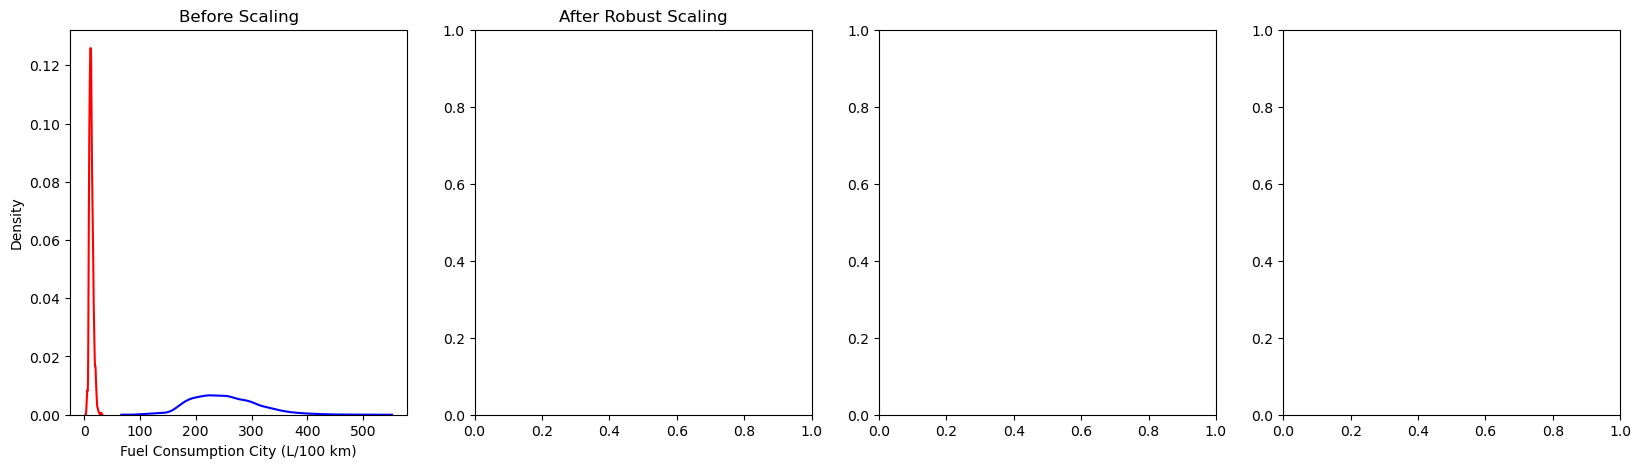

In [7]:
# -----------------------------
# scale the dataset
# -----------------------------

data = df_cars[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]
fuel_consumption = 'Fuel Consumption City (L/100 km)'
co2_emissions = 'CO2 Emissions(g/km)'

# Standard deviation
# StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
standard_scale = StandardScaler()

x_standard_scale = standard_scale.fit_transform(data)
x_standard_scale = pd.DataFrame(x_standard_scale, columns = [fuel_consumption, co2_emissions])

print(x_standard_scale)

# Min Max Scaler
# MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset
min_max_scale = MinMaxScaler()

x_min_max_scale = min_max_scale.fit_transform(data)
x_min_max_scale = pd.DataFrame(x_min_max_scale, columns = [fuel_consumption, co2_emissions])

print(x_min_max_scale)

# Robust Scaler
# RobustScaler scales the data to median and quantiles. Therefore, the outliers are not affected by the scaling.
robust_scale = RobustScaler()

x_robust_scale = robust_scale.fit_transform(data)
x_robust_scale = pd.DataFrame(x_robust_scale, columns = [fuel_consumption, co2_emissions])

print(x_robust_scale)

# -----------------------------
# plot the dataset to show the scaling
# -----------------------------

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_cars[fuel_consumption], ax = ax1, color ='r')
sns.kdeplot(df_cars[co2_emissions], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')  
sns.kdeplot(x_robust_scale[fuel_consumption], ax = ax2, color ='red')
sns.kdeplot(x_robust_scale[co2_emissions], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(x_standard_scale[fuel_consumption], ax = ax3, color ='black')
sns.kdeplot(x_standard_scale[co2_emissions], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(x_min_max_scale[fuel_consumption], ax = ax4, color ='black')
sns.kdeplot(x_min_max_scale[co2_emissions], ax = ax4, color ='g')
plt.show()

